# Предсказание цен на недвижимость

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv', sep=',')
test = pd.read_csv('test.csv', sep=',')

## Соединение и редактирование таблиц

In [3]:
train['is_test'] = 0
test['is_test'] = 1

In [4]:
df = pd.concat([train, test])

In [5]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,is_test
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,1
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,1
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,1
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN,1


### Удаление фичей, имеющих большинство значений = Nan (фича Utilities во всех строках одинаковая)

In [6]:
#df.isnull().sum()[df.isnull().sum() > 1000]

In [7]:
df.drop(["Alley", "PoolQC", "Fence", "MiscFeature", "FireplaceQu", "Utilities", ], axis=1, inplace=True)

### Преобразование категориальных фичей в бинарные

In [8]:
df_dummies = pd.get_dummies(df)

In [9]:
X_train = df_dummies[df_dummies.is_test==0].drop('is_test', axis=1)
X_test = df_dummies[df_dummies.is_test==1].drop('is_test', axis=1)

### Заполнение пропущенных значений

In [10]:
X_train.isnull().sum()[X_train.isnull().sum() > 0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [11]:
from sklearn.impute import SimpleImputer

In [12]:
imputer = SimpleImputer().fit_transform(X_train)
X_train_imputed = pd.DataFrame(imputer, columns=X_train.columns)

In [13]:
X_train_imputed.isnull().sum()[X_train_imputed.isnull().sum() > 0]

Series([], dtype: int64)

### Формирование выборок

In [14]:
X_test.shape

(1459, 270)

In [15]:
X, y = X_train_imputed.drop(columns=['SalePrice']), X_train_imputed.SalePrice

In [16]:
train_share = 0.8
train_size = int(train_share*X.shape[0])

In [17]:
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

### Обучение модели

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()

In [20]:
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = lr.predict(X_test)

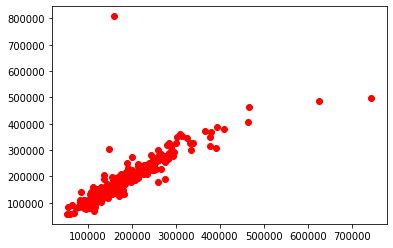

In [22]:
from matplotlib import pyplot as plt
plt.plot(y_test, y_pred, 'ro')

In [23]:
lr.score(X_test, y_test)

0.6632125479635447

## MSE

In [24]:
MSE = np.mean((y_pred - y_test)**2)

In [25]:
MSE**0.5

47521.40902967282